<a href="https://colab.research.google.com/github/J1gsy/Data_Mining/blob/main/assignment03_preprocessing_H071191012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Structured Data

## Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Datasets/Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
df.value_counts()

MouseID   DYRK1A_N  ITSN1_N   BDNF_N    NR1_N     NR2A_N    pAKT_N    pBRAF_N   pCAMKII_N  pCREB_N   pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N    pNR1_N    pNR2A_N   pNR2B_N   pPKCAB_N  pRSK_N    AKT_N     BRAF_N    CAMKII_N  CREB_N    ELK_N     ERK_N     GSK3B_N   JNK_N     MEK_N     TRKA_N    RSK_N     APP_N     Bcatenin_N  SOD1_N    MTOR_N    P38_N     pMTOR_N   DSCR1_N   AMPKA_N   NR2B_N    pNUMB_N   RAPTOR_N  TIAM1_N   pP70S6_N  NUMB_N    P70S6_N   pGSK3B_N  pPKCG_N   CDK5_N    S6_N      ADARB1_N  AcetylH3K9_N  RRP1_N    BAX_N     ARC_N     ERBB4_N   nNOS_N    Tau_N     GFAP_N    GluR3_N   GluR4_N   IL1B_N    P3525_N   pCASP9_N  PSD95_N   SNCA_N    Ubiquitin_N  pGSK3B_Tyr216_N  SHH_N     BAD_N     BCL2_N    pS6_N     pCFOS_N   SYP_N     H3AcK18_N  EGR1_N    H3MeK4_N  CaNA_N    Genotype  Treatment  Behavior  class 
293_1     0.364727  0.649212  0.333576  2.670424  4.657333  0.263273  0.201576  4.537091   0.262303  1.492121  0.382061  0.361697  0.336485  0.310303  0.991515  1.0

In [ ]:
column_names = df.columns
column_names_class = column_names[78:]
column_names_class

Index(['Genotype', 'Treatment', 'Behavior', 'class'], dtype='object')

In [ ]:
for i in column_names_class:
    print(df[i].value_counts())

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Memantine    570
Saline       510
Name: Treatment, dtype: int64
S/C    555
C/S    525
Name: Behavior, dtype: int64
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


In [ ]:
# sns.set()
# cols = column_names_class
# sns.pairplot(df[cols], size=2.5)
# plt.show()

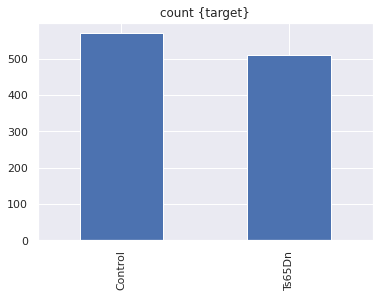

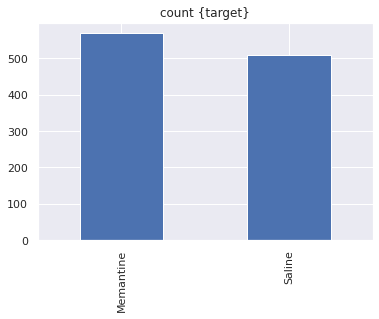

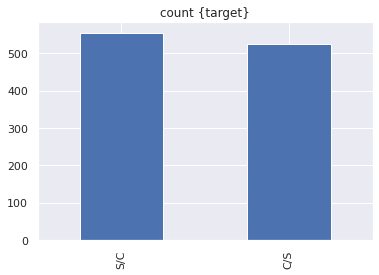

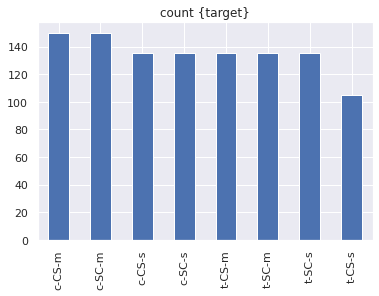

In [ ]:
for i in column_names_class:
    df[i].value_counts().plot(kind='bar', title='count {target}')
    plt.show()

In [ ]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [ ]:
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [ ]:
df = df.drop(['MouseID', 'Behavior', 'Genotype', 'class'], axis=1)

## Handle missing value

In [ ]:
df.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Treatment      0
Length: 78, dtype: int64

In [ ]:
df.shape

(1080, 78)

### remove the row/columns that contain missing value

In [ ]:
df_remove_byindex = df.dropna(axis=1, how='all', inplace=False) # --> Drop Missing value
# determine if rows or columns which contain missing value are removed.
# axis = 0, is index : drop rows which contain missing value
# axis = 1, is columns : drop columns which contain missing value
df_remove_byindex.shape

(1080, 78)

### fill another value to a rows/columns that have missing value

In [ ]:
# fill with mean
df_fill_withmean = df.fillna(df.mean())
df_fill_withmean.isnull().sum()

/tmp/ipykernel_11189/4104785191.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fill_withmean = df.fillna(df.mean())


DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Treatment    0
Length: 78, dtype: int64

In [ ]:
#fill with median
df_fill_withmedian = df.fillna(df.median())
df_fill_withmedian.isnull().sum()

/tmp/ipykernel_11189/4212209564.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fill_withmedian = df.fillna(df.median())


DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Treatment    0
Length: 78, dtype: int64

In [ ]:
df = df.fillna(df.mean())

/tmp/ipykernel_11189/2170423701.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [ ]:
df['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

<AxesSubplot:title={'center':'Count {target}'}>

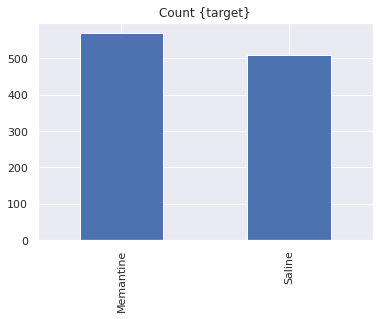

In [ ]:
df['Treatment'].value_counts().plot(kind='bar', title='Count {target}')

## Categorical encoding using :
### - label Encoding
### - One-Hot-Encoder

1. One-Hot-Encoder

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_fill_withmean, columns = ["Treatment"])
print(one_hot_encoded_data)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...    BCL2_N     pS6_N   

2. Label Encoding

In [ ]:
cleanup_nums = {'Treatment' : {'Memantine' : 1.0, 'Saline' : 2.0}}
df.replace(cleanup_nums, inplace=True)
df.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Treatment    float64
Length: 78, dtype: object

In [ ]:
# separate "class' with data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [ ]:
column_name = list(X.columns)

## Normalization
normalisasi dibutuhkan apabila setiap atribut/variabel memiliki range nilai tertentu yang tidak sama untuk setiap feature.
ini bertujuan untuk menyeragamkan data agar saat diolah, datanya tidak terlalu jauh range nya

1. Z-Score : berdasarkan standar deviasi

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

# fit
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,0.691475,...,-1.333224,0.0,-1.066276,-0.987371,-0.285744,-1.011615,-1.416624,-1.607891,1.065901,-0.945905
1,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,0.359831,...,-1.558938,0.0,-1.046167,-1.162114,-0.067645,-1.063458,-1.325218,-1.546844,1.280291,-0.945905
2,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,0.284600,...,-1.489897,0.0,-0.926271,-1.079366,-0.155059,-1.065130,-1.373257,-1.623595,1.857038,-0.945905
3,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,0.357061,...,-0.950252,0.0,-1.285019,-0.860192,-0.818989,-0.723367,-0.984718,-1.218364,1.144490,-0.945905
4,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,0.162107,...,-1.057141,0.0,-1.172895,-0.884881,-0.179502,-0.943378,-1.181435,-1.187585,1.583530,-0.945905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.686822,-0.611173,-1.303022,-0.591916,-1.335557,-0.515734,-0.392136,-0.814816,-0.161617,-0.795452,...,1.231384,0.0,-0.400501,2.271885,-1.084095,2.752434,0.593908,2.557657,0.085303,1.057188
1076,-0.617165,-0.569084,-1.368405,-0.391978,-1.119256,0.435677,0.024078,-0.792387,0.115758,-0.745716,...,1.230633,0.0,-0.554066,1.939381,-1.066451,2.878967,0.476768,1.831447,0.084215,1.057188
1077,-0.791928,-0.883543,-1.723830,-1.627251,-1.742681,-0.300860,-0.756205,-1.196955,-0.842679,-1.168015,...,2.221935,0.0,-0.180275,1.184059,-0.360708,2.799004,1.270782,3.117243,0.293525,1.057188
1078,-0.821888,-0.813014,-1.523876,-1.214259,-1.567417,-0.584046,-0.304649,-1.122460,-0.631176,-1.085935,...,2.432939,0.0,0.264492,2.835680,-0.728860,3.068958,1.881179,3.328290,0.208996,1.057188


2. Min-Max Scaler : samakan nilai minimun dengan maximum dari setiap nilai yang ada pada seluruh atribut

In [ ]:
# Before
print('Min: ', X.min(axis=0))
print('Max: ', X.max(axis=0))

Min:  DYRK1A_N     0.145327
ITSN1_N      0.245359
BDNF_N       0.115181
NR1_N        1.330831
NR2A_N       1.737540
               ...   
SYP_N        0.258626
H3AcK18_N    0.079691
EGR1_N       0.105537
H3MeK4_N     0.101787
CaNA_N       0.586479
Length: 77, dtype: float64
Max:  DYRK1A_N     2.516367
ITSN1_N      2.602662
BDNF_N       0.497160
NR1_N        3.757641
NR2A_N       8.482553
               ...   
SYP_N        0.759588
H3AcK18_N    0.479763
EGR1_N       0.360692
H3MeK4_N     0.413903
CaNA_N       2.129791
Length: 77, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)

In [ ]:
# After
print('Min: ', data_scaled.min(axis=0))
print('Max: ', data_scaled.max(axis=0))

Min:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [ ]:
# update data
df = pd.DataFrame(data=data_scaled, columns=column_name)

In [ ]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.118296,0.157699,0.533818,0.398234,0.312289,0.357140,0.465586,0.358347,0.515739,0.175861,...,0.349804,0.359346,0.299172,0.593119,0.266694,0.374174,0.224755,0.304119,0.332097,0.486813
std,0.105024,0.106601,0.129103,0.142908,0.138147,0.087380,0.106727,0.211332,0.168230,0.082025,...,0.143213,0.136600,0.130048,0.156038,0.134524,0.132609,0.135530,0.142114,0.154010,0.205484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060242,0.096852,0.451515,0.300115,0.210933,0.299665,0.397498,0.185596,0.403317,0.136755,...,0.249611,0.272264,0.217472,0.476368,0.169213,0.278377,0.135671,0.210190,0.232233,0.320702
50%,0.093298,0.136175,0.527572,0.398234,0.300335,0.353100,0.467258,0.324445,0.505952,0.163139,...,0.336580,0.359346,0.299172,0.594273,0.251577,0.378936,0.224755,0.304119,0.332097,0.473632
75%,0.144345,0.191805,0.609609,0.493324,0.398452,0.407698,0.526370,0.512519,0.629388,0.199127,...,0.423804,0.409264,0.324439,0.707167,0.333168,0.463402,0.268658,0.355063,0.376319,0.647532
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Detect, Handle, and Visualize Outliers

visualize outliers with box plot

<AxesSubplot:ylabel='DYRK1A_N'>

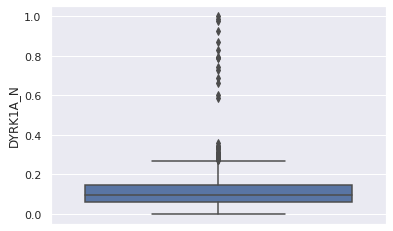

In [ ]:
sns.boxplot(y=df['DYRK1A_N']) # --> how to check outliers with boxplot

In [ ]:
df = pd.concat([df, y], axis=1)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.215008,0.299172,0.410187,0.147711,0.350381,0.096959,0.136298,0.149281,0.812053,1.0


visualize outliers with scatter plot

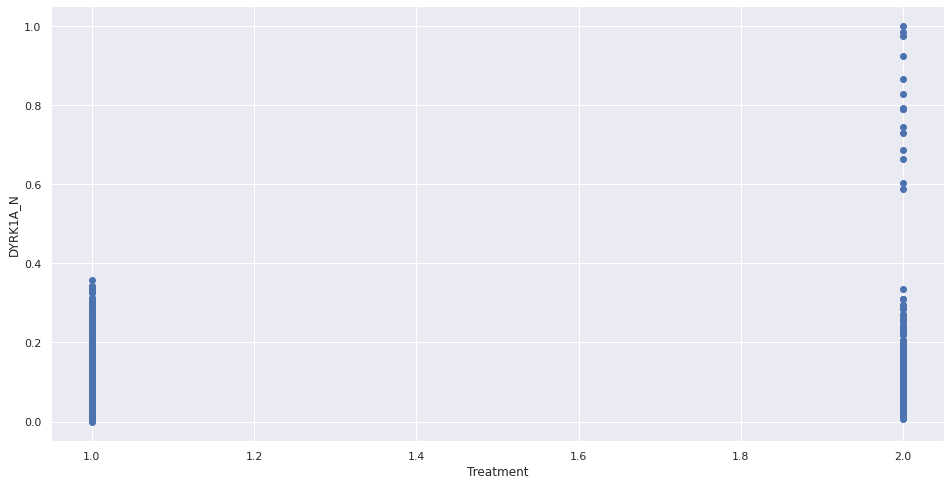

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Treatment'], df['DYRK1A_N']) # --> how to check outliers with scatter plot
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

use for loop to visualize all columns

/tmp/ipykernel_11189/2619863379.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop('Treatment',1)


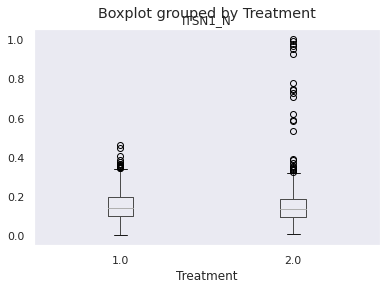

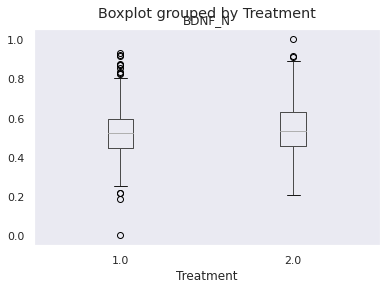

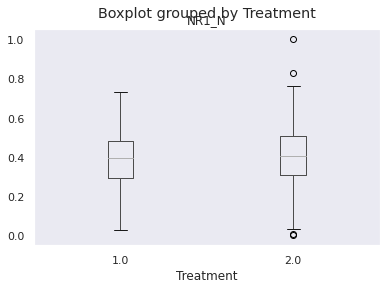

In [ ]:
x = df.drop('Treatment',1)
columns_name = list(x.columns)

for i in column_name[1:4]:
    df.boxplot(by='Treatment', column=[i], grid=False)

### handle using z-score

identified outliers by Z-score ( -3 > z & z > 3)

In [ ]:

from scipy import stats

z = np.abs(stats.zscore(df))
print(z)
#it is dificult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.312711  0.517934  2.253669  1.497362  2.304365  0.345019  0.158601   
1     0.356798  0.286501  1.880279  1.420009  1.976769  0.518126  0.334523   
2     0.334966  0.450465  2.012928  1.124860  1.909149  0.581298  0.226891   
3     0.065474  0.000103  0.802123  0.489481  1.219245  0.247424  0.199461   
4     0.036682  0.001305  0.805692  0.197652  0.939202  0.482759  0.304516   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.686822  0.611173  1.303022  0.591916  1.335557  0.515734  0.392136   
1076  0.617165  0.569084  1.368405  0.391978  1.119256  0.435677  0.024078   
1077  0.791928  0.883543  1.723830  1.627251  1.742681  0.300860  0.756205   
1078  0.821888  0.813014  1.523876  1.214259  1.567417  0.584046  0.304649   
1079  0.494916  0.621255  1.268453  0.589872  1.341664  0.429124  0.369178   

      pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N        BCL2_

In [ ]:
# before dump the outliers
df.shape

(1080, 78)

In [ ]:
# after dump the outliers
# use the Z-score

dataset_cleared_zscore = df[(z < 3).all(axis=1)]
dataset_cleared_zscore

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.215008,0.299172,0.410187,0.147711,0.350381,0.096959,0.136298,0.149281,0.812053,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.079337,0.114111,0.526790,0.406379,0.254166,0.363012,0.542319,0.263240,0.530645,0.121313,...,0.415872,0.299172,0.552213,0.145491,0.273033,0.495235,0.254268,0.511825,0.460334,2.0
1073,0.057198,0.120249,0.482915,0.395647,0.223277,0.384151,0.520720,0.261773,0.563221,0.125322,...,0.406839,0.299172,0.599970,0.116592,0.299238,0.493636,0.302205,0.433242,0.460592,2.0
1074,0.036123,0.075608,0.364569,0.221717,0.105214,0.307888,0.342729,0.137262,0.385500,0.091605,...,0.617371,0.299172,0.553272,0.526990,0.262143,0.536498,0.369655,0.661053,0.540244,2.0
1075,0.046197,0.092577,0.365672,0.313684,0.127872,0.312096,0.423753,0.186230,0.488562,0.110645,...,0.527476,0.299172,0.530654,0.572176,0.230480,0.597619,0.388482,0.725820,0.504334,2.0


### handle outliers using Algorithm for IQR (Interquartile Range)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DYRK1A_N     0.084103
ITSN1_N      0.094952
BDNF_N       0.158094
NR1_N        0.193209
NR2A_N       0.187519
               ...   
H3AcK18_N    0.132987
EGR1_N       0.144874
H3MeK4_N     0.144086
CaNA_N       0.326830
Treatment    1.000000
Length: 78, dtype: float64


In [ ]:
# before dump the outliers
df.shape

(1080, 78)

In [ ]:
# after dump the outliers
# using IQR

dataset_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset_cleared_iqr.shape)

(543, 78)


In [ ]:
df_out = dataset_cleared_iqr

In [ ]:
df_out['Treatment'].value_counts()

1.0    298
2.0    245
Name: Treatment, dtype: int64

<AxesSubplot:title={'center':'Count {target}'}>

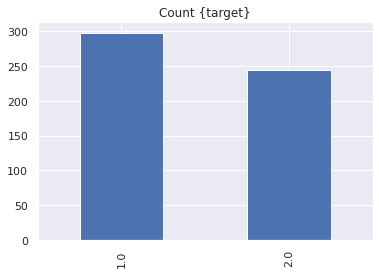

In [ ]:
df_out['Treatment'].value_counts().plot(kind='bar', title='Count {target}')

berdasarkan grafik diatas data dari kedua kelas memiliki perbedaan yang cukup tinggi sehingga kita harus memperbaikinya. inilah yang dinamankan resampling

## Resampling

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_out.iloc[:,:-1]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

[05:15:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 95.41%


/home/risqullah/Coding/data-mining/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
df['Treatment'].unique()

array([1., 2.])

Confusion matrix:
 [[58  4]
 [ 1 46]]


/tmp/ipykernel_11189/1058296913.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_11189/1058296913.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


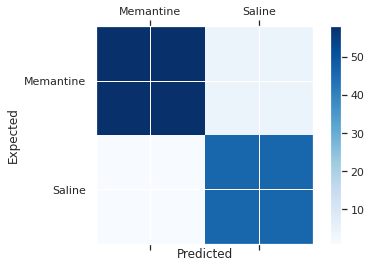

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
print("Before : ",Counter(y))

Before :  Counter({1.0: 298, 2.0: 245})


1. Random Over Sampling

In [ ]:
# instantiating the random oversample
ros = RandomOverSampler()

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution
print("After : ",Counter(y_ros))

After :  Counter({1.0: 298, 2.0: 298})


2. SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({1.0: 298, 2.0: 298})


3. SMOTE Tomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)
print(Counter(y_smt))

Counter({1.0: 298, 2.0: 298})


4. Random Under Sampling

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler()

# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({1.0: 245, 2.0: 245})


5. Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

print(Counter(y_tl))

Counter({1.0: 298, 2.0: 245})


6. cluster centroid

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
x_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

Counter({1.0: 245, 2.0: 245})
